In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import pandas as pd
from numba import jit
plt.style.use(['science', 'notebook', 'grid'])

$$\psi_{n_x}=\sqrt{2} e^{-iE_{n_x}t} \sin{(n_x\pi x)}$$ <br>

$$ \frac{\partial^2}{\partial x'^2}\psi = 2V'(x) \psi - 2i \frac{\partial}{\partial t'} \psi $$

In [2]:
Nx = 201
Nt = 5000
dx = 1/(Nx-1)
dt = 1e-7
x = np.linspace(0, 1, Nx)

In [3]:
def plot_V(x,V):
    plt.figure(figsize=(8,3))
    plt.plot(x,V)
    plt.xlabel('$x$')
    plt.ylabel('$V(x)$')

In [4]:
def V_gaussian(x):
    mu, sigma = 1/2, 1/20
    return -1e4*np.exp(-(x-mu)**2/(2*sigma**2))

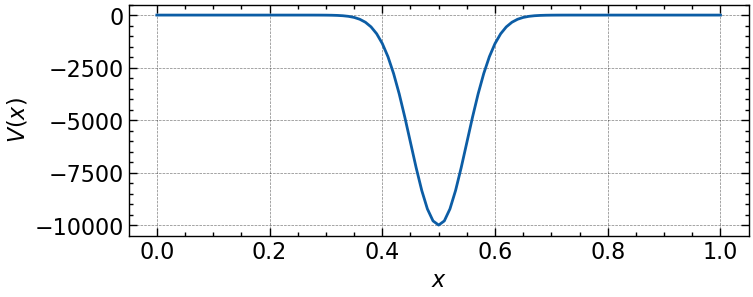

In [5]:
x_ = np.linspace(0,1,101)
V_ = V_gaussian(x_)
plot_V(x_,V_)

In [6]:
def psi_eq(x,t,n):
    E = ((n*np.pi)**2)/2
    psi = np.sqrt(2)*np.exp(-1j*E*t)*np.sin(n*np.pi*x)
    dpsidx = np.sqrt(2)*np.exp(-1j*E*t)*n*np.pi*np.cos(n*np.pi*x)
    psi0 = np.zeros((Nt,Nx,2), dtype = complex)
    for i in range(Nx):
        psi0[t][i][0] += psi[i]
        psi0[t][i][1] += dpsidx[i]
    return psi0[0]

In [7]:
# @numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def runkut_int(F,V,Nx,Nt,psi_eq): 
    n = 1
    dx = 1/(Nx-1)
    dt = 1e-7
    E = (n*np.pi)**2/2
    x = np.linspace(0, 1, Nx)
    y = 0
    Y = np.zeros((Nt,Nx,2), dtype=complex)
    Y[0] += psi_eq(x,t=0,n=1)
    for t in range(0, Nt-1):
        X = dx
        for i in range(1,Nx-1):
            Y[t+1][i] += Y[t][i] + run_kut4(F, dx, X, Y[t][i], t, n, V)
            X += dx
        
#         psi = np.zeros([Nt,Nx]).astype(complex)
#         normal = np.sum(np.absolute(Y[t])**2)
#         for i in range(0, Nx):
#             psi[t][i] += Y[t][i]/normal
        
    return x, Y#, psi

In [8]:
def runkut_intx(F,V,Nx,Nt,psi_eq): 
    n = 1
    dx = 1/(Nx-1)
    dt = 1e-7
    E = (n*np.pi)**2/2
    x = np.linspace(0, 1, Nx)
    y = 0
    Y = np.zeros((Nt,Nx,2), dtype=complex)
    Y[0] += psi_eq(x,t=0,n=1)
    for t in range(0, Nt-1):
        X = dx
        for i in range(1,Nx-1):
            Y[t+1][i] += Y[t][i] + run_kut4(F, dx, X, Y[t][i], t, n, V)
            X += dx
        
        psi = np.zeros((Nt,Nx,2)).astype(complex)
        normal = np.sum(np.absolute(Y[t])**2)
        for i in range(0, Nx):
            psi[t][i] += Y[t][i]/normal
        
    return x, Y, psi

In [9]:
def run_kut4(F,h,x,y,t,n,V): #x,y,t,n,V
        K0 = F(x, y, t, n, V(x)) 
        K1 = F(x + h/2.0, y + K0/2.0, t, n, V(x))
        K2 = F(x + h/2.0, y + K1/2.0, t, n, V(x))
        K3 = F(x + h, y + K2, t, n, V(x))
        return h*(K0 + 2.0*K1 + 2.0*K2 + K3)/6.0    

In [10]:
def psi0(x,y,t,n,V):
    E = ((n*np.pi)**2)/2
    psi = np.sqrt(2)*np.exp(-1j*E*t)*np.sin(n*np.pi*x)
    dpsidt = (-1j*E)*psi
    dpsidx = np.sqrt(2)*np.exp(-1j*E*t)*n*np.pi*np.cos(n*np.pi*x)
    psi_ = np.zeros(2, dtype=complex)
    psi_[0] += dpsidx #dpsi/dx
    psi_[1] += psi*(2*V-2j*dpsidt) #dpsi/dt
    return psi_

In [11]:
%%time
x1, y1 = runkut_int(F=psi0,V=V_gaussian,Nx=Nx,Nt=Nt,psi_eq=psi_eq)


CPU times: total: 3min 4s
Wall time: 3min 10s


In [12]:
def graph(a,b,title):
    fig = plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 15})
    plt.title('{}'.format(title), fontsize = 20, color = 'red')
    plt.xlabel('x')
    plt.ylabel('psi')
    plt.plot(a,b, 'o-', color = 'r', label = 'x solution')
    plt.legend(loc='upper right', fontsize=10)
    plt.show()

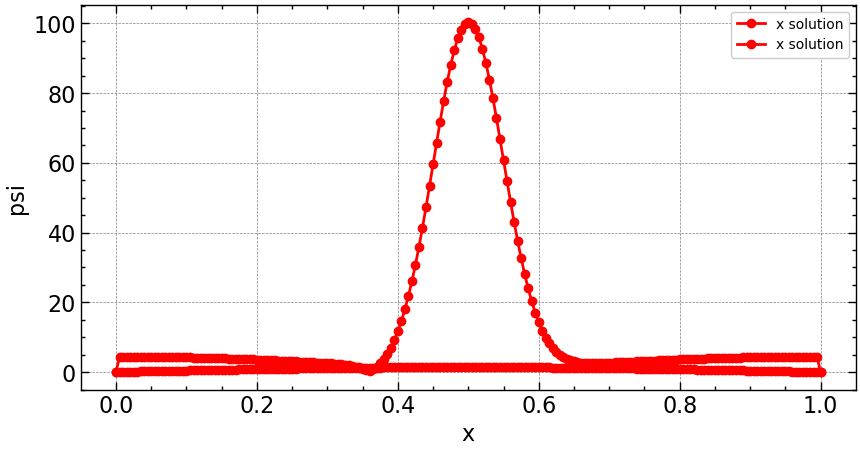

In [13]:
graph(x1, np.absolute(y1[10]),"")

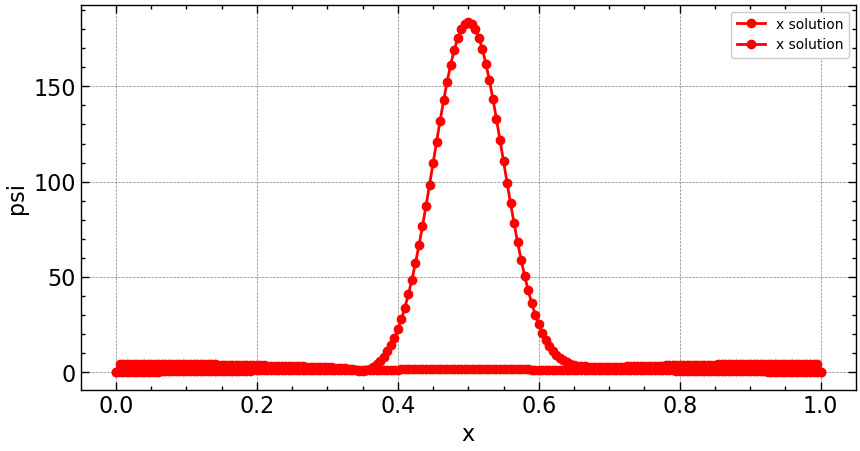

In [14]:
graph(x1, np.absolute(y1[500]),"")

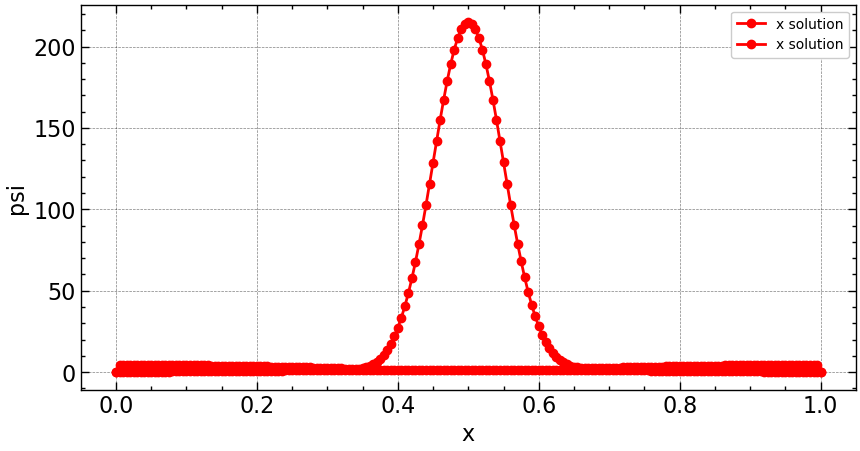

In [15]:
graph(x1, np.absolute(y1[1000]),"")

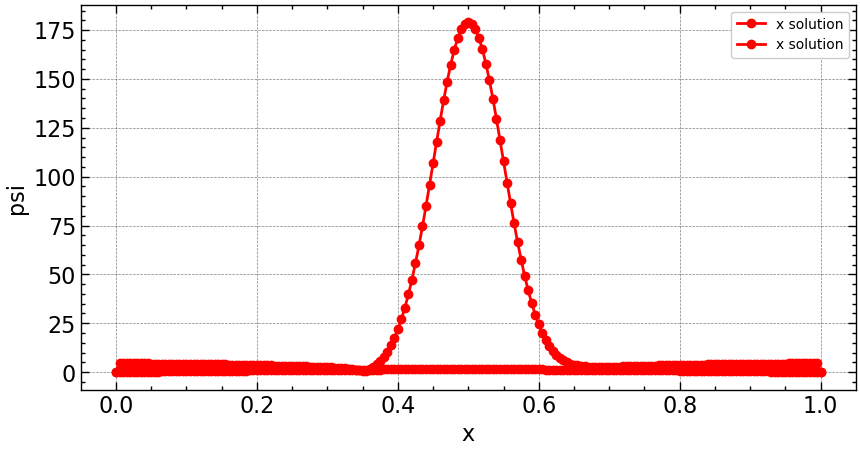

In [16]:
graph(x1, np.absolute(y1[2499]),"")

In [17]:
Nx = 101
Nt = 500
dx = 1/(Nx-1)
dt = 1e-7
t = 0
n = 1
E = ((n*np.pi)**2)/2
x = np.linspace(0, 1, Nx)

In [18]:
x1, y1 = runkut_intx(psi0)

TypeError: runkut_intx() missing 4 required positional arguments: 'V', 'Nx', 'Nt', and 'psi_eq'

In [ ]:
x[5]

In [ ]:
E = ((n*np.pi)**2)/2
psi = np.sqrt(2)*np.exp(-1j*E*t)*np.sin(n*np.pi*x)
dpsidx = np.sqrt(2)*np.exp(-1j*E*t)*n*np.pi*np.cos(n*np.pi*x)
psi0 = np.zeros((Nt,Nx,2), dtype = complex)
for i in range(Nx):
    psi0[0][i][0] += psi[i]
    psi0[0][i][1] += dpsidx[i]

In [ ]:
psi0

In [ ]:
temp = np.zeros((Nt,Nx,2), dtype = complex)
temp[0] += psi0[0]

In [ ]:
temp

In [ ]:
psi_ = np.zeros(2, dtype=complex)
psi_[0] = 500 +2j
psi_[1] = 3530 +3j

In [ ]:
psi_

In [ ]:
temp[1][0] += psi_

In [ ]:
temp